<a href="https://colab.research.google.com/github/hongyingwang2020/House_pricing_dataset/blob/master/kagglegaby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
train_data = pd.read_csv("dataset_csv/train.csv",index_col='ad_id')
test_data = pd.read_csv("dataset_csv/test.csv",index_col='ad_id')


In [ ]:
train_data.head()

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,,
996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [ ]:
train_data.shape

(2982, 16)

In [ ]:
# unimportant features - known from data description
unwanted_features = [
    'facility','area','description_block','environment','no_of_units','property_category','features','county'
]

new_data = train_data.drop(unwanted_features, axis=1)

In [ ]:
new_data.shape

(2982, 8)

In [ ]:
new_data.columns

Index(['bathrooms', 'beds', 'ber_classification', 'latitude', 'longitude',
       'price', 'property_type', 'surface'],
      dtype='object')

In [ ]:
# get columns with nan values
nan_per = new_data.isna().sum() / new_data.isna().count()
nan_features = new_data.loc[:,nan_per > 0].columns
nan_features

Index(['bathrooms', 'beds', 'ber_classification', 'price', 'property_type',
       'surface'],
      dtype='object')

In [ ]:
# get coulumns with nan percent >= threshold to delete them
threshold = 0.6
nan_drop = new_data.loc[:,nan_per >= threshold].columns
new_data.drop(nan_drop, axis=1, inplace=True)
nan_features = nan_features.drop(nan_drop) # remainder nan features

In [ ]:
new_data.columns

Index(['bathrooms', 'beds', 'ber_classification', 'latitude', 'longitude',
       'price', 'property_type', 'surface'],
      dtype='object')

In [ ]:
# explore nan_features
new_data[nan_features].dtypes

bathrooms             float64
beds                  float64
ber_classification     object
price                 float64
property_type          object
surface               float64
dtype: object

In [ ]:
nan_features

Index(['bathrooms', 'beds', 'ber_classification', 'price', 'property_type',
       'surface'],
      dtype='object')

In [ ]:
nan_meaning_features = ['ber_classification', 'property_type']
for col in nan_meaning_features:
    new_data[col].fillna(0, inplace=True)
    #new_data[col].fillna(new_data[col].mode().iat[0], inplace=True)
nan_features = nan_features.drop(nan_meaning_features)

In [ ]:
nan_features

Index(['bathrooms', 'beds', 'price', 'surface'], dtype='object')

In [ ]:
# fill nan values with most frequency value
for col in nan_features:
    new_data[col].fillna(new_data[col].mode().iat[0], inplace=True)

In [ ]:
# get categorical features
cat_cols = new_data.select_dtypes('object').columns
cat_cols

Index(['ber_classification', 'property_type'], dtype='object')

In [ ]:
# get unique values of categorical features
for col in cat_cols:
    uv = new_data[col].unique()
    print(f'{col} ({len(uv)}) ==> {uv}')

ber_classification (17) ==> [0 'A3' 'A2' 'E2' 'G' 'C1' 'F' 'C2' 'C3' 'D2' 'D1' 'B2' 'E1'
 'SINo666of2006exempt' 'B3' 'B1' 'A1']
property_type (11) ==> [0 'detached' 'semi-detached' 'apartment' 'terraced' 'site' 'bungalow'
 'townhouse' 'end-of-terrace' 'duplex' 'studio']


In [ ]:
# map categorical values
new_data['ber_classification'] = new_data['ber_classification'].map({0:0 ,'A3':1 ,'A2':2 ,'E2':3, 'G':4, 'C1':5 ,'F':6 ,'C2':7, 'C3':8, 
                                                           'D2':9, 'D1':10 ,'B2':11 ,'E1':12, 'SINo666of2006exempt':13,'B3':14, 'B1':15, 'A1': 16})
new_data['property_type'] = new_data['property_type'].map({0:0, 'detached':1, 'semi-detached':2, 'apartment':3, 'terraced':4,'site':5, 'bungalow':6
 ,'townhouse':7, 'end-of-terrace':8, 'duplex':9, 'studio':10})

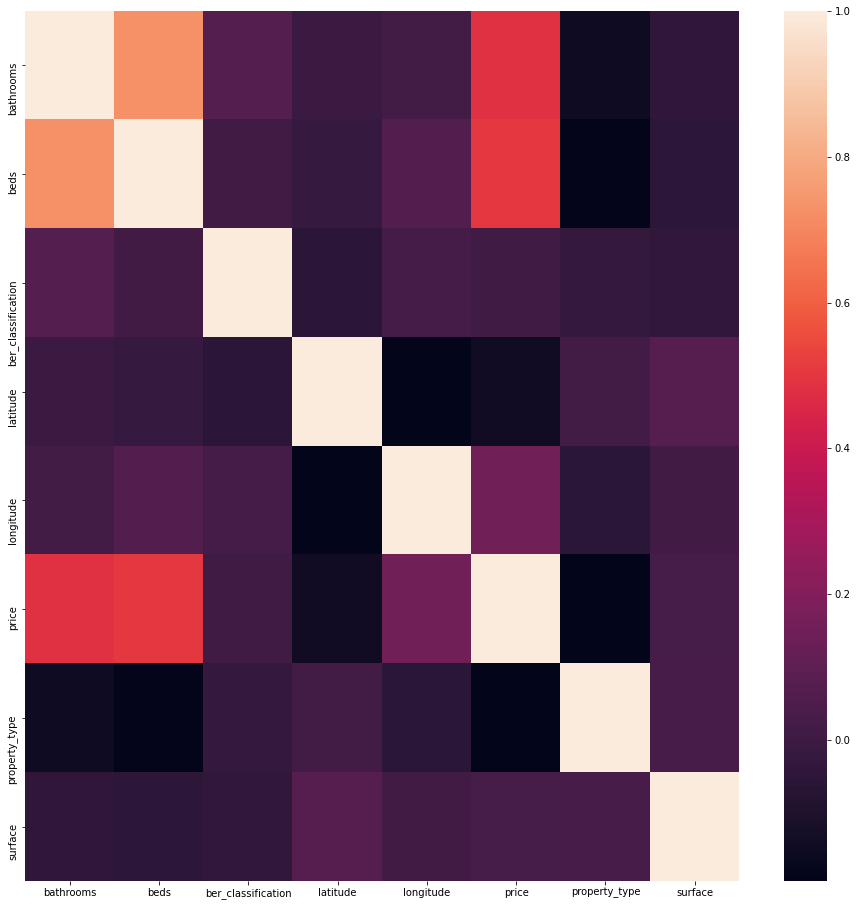

In [ ]:
correlations = new_data.corr()
plt.figure(figsize = (16,16))
sns.heatmap(correlations)

In [ ]:
uncorr_features = correlations['price'][correlations['price'] > -0.05]
uncorr_features = uncorr_features[uncorr_features < 0.05]
uncorr_features.index

Index(['ber_classification', 'surface'], dtype='object')

In [ ]:
new_data

,bathrooms,beds,ber_classification,latitude,longitude,price,property_type,surface
ad_id,,,,,,,,
996887,1.0,3.0,0,53.418216,-6.149329,295000.0,0,80.0
999327,1.0,3.0,0,53.364917,-6.454935,295000.0,0,80.0
999559,1.0,3.0,0,53.273447,-6.313821,295000.0,0,80.0
9102986,1.0,3.0,0,53.608167,-6.210914,295000.0,0,80.0
9106028,1.0,3.0,0,53.262531,-6.181527,295000.0,0,80.0
...,...,...,...,...,...,...,...,...
12428232,2.0,2.0,8,53.338738,-6.237199,415000.0,3,56.0
12428240,1.0,3.0,11,53.335793,-6.294268,485000.0,4,101.0
12428247,1.0,2.0,8,53.346098,-6.276856,299000.0,3,55.6


In [ ]:
new_data.drop(uncorr_features.index[1:], axis=1, inplace=True)

In [ ]:
new_data

,bathrooms,beds,ber_classification,latitude,longitude,price,property_type
ad_id,,,,,,,
996887,1.0,3.0,0,53.418216,-6.149329,295000.0,0
999327,1.0,3.0,0,53.364917,-6.454935,295000.0,0
999559,1.0,3.0,0,53.273447,-6.313821,295000.0,0
9102986,1.0,3.0,0,53.608167,-6.210914,295000.0,0
9106028,1.0,3.0,0,53.262531,-6.181527,295000.0,0
...,...,...,...,...,...,...,...
12428232,2.0,2.0,8,53.338738,-6.237199,415000.0,3
12428240,1.0,3.0,11,53.335793,-6.294268,485000.0,4
12428247,1.0,2.0,8,53.346098,-6.276856,299000.0,3


In [ ]:
def process_data(data):
    unwanted_features = [
    'facility','area','description_block','environment','no_of_units','property_category','features','county','ber_classification', 'surface'
]
    new_data = data.drop(unwanted_features, axis=1)
    nan_meaning_features = ['property_type']
    for col in nan_meaning_features:
        new_data[col].fillna(0, inplace=True)
    # fill nan values with most frequency value
    nan_features = ['bathrooms', 'beds','price']
    for col in nan_features:
        if(col in data.columns):
            
            new_data[col].fillna(new_data[col].mode().iat[0], inplace=True)
    # map categorical values
    # map categorical values
    #new_data['ber_classification'] = new_data['ber_classification'].map({0:0 ,'A3':1 ,'A2':2 ,'E2':3, 'G':4, 'C1':5 ,'F':6 ,'C2':7, 'C3':8, 'D2':9, 'D1':10 ,'B2':11 ,'E1':12, 'SINo666of2006exempt':13,'B3':14, 'B1':15, 'A1': 16})
    new_data['property_type'] = new_data['property_type'].map({0:0, 'detached':1, 'semi-detached':2, 'apartment':3, 'terraced':4,'site':5, 'bungalow':6
 ,'townhouse':7, 'end-of-terrace':8, 'duplex':9, 'studio':10})
    
    return new_data

In [ ]:
train_data

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,,
996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6


In [ ]:
new_data = process_data(train_data)

rows, cols = new_data.shape
X_train =new_data.drop(['price'],axis=1)
y_train = new_data['price']



In [ ]:
new_test_data = process_data(test_data)

In [ ]:
#MultinomialNB

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB

n_bins = 7

#discretise
est = KBinsDiscretizer(n_bins=n_bins,encode='onehot',strategy='uniform')
est.fit(X_train)
Xd_train = est.transform(X_train)
Xd_test  = est.transform(new_test_data)
clf = MultinomialNB() 
#training
clf.fit(Xd_train, y_train)
#prediction
y_tr_pred  = clf.predict(Xd_train)
#accuracy

In [ ]:
#compute training error
M = np.hstack([y_train[:,None],y_tr_pred[:,None]])
M


array([[295000., 295000.],
       [295000., 295000.],
       [295000., 295000.],
       ...,
       [299000., 295000.],
       [495000., 295000.],
       [525000., 495000.]])

In [ ]:
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

32.82180637062842


In [ ]:
# linear regression

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
y_tr_pred=lr.predict(X_train)
y_te_pred=lr.predict(new_test_data)

In [ ]:
#
#compute training error for linear regression
M = np.hstack([y_train[:,None],y_tr_pred[:,None]])
M

array([[295000.        , 502904.76516735],
       [295000.        , 411787.55521588],
       [295000.        , 535627.97000888],
       ...,
       [299000.        , 312107.29677278],
       [495000.        , 504106.04941148],
       [525000.        , 565448.93963468]])

In [ ]:
# linear MAPE
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

42.24544230447963


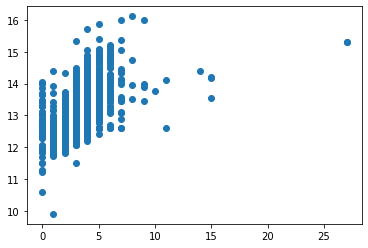

In [ ]:
plt.scatter(X_train[['beds']],np.log(y_train))

In [ ]:
new_test_data

,bathrooms,beds,latitude,longitude,property_type
ad_id,,,,,
12373510,2.0,4.0,53.566881,-6.101148,6
12422623,2.0,3.0,53.362992,-6.452909,4
12377408,3.0,4.0,53.454198,-6.262964,2
12420093,4.0,3.0,53.354402,-6.458647,2
12417338,1.0,3.0,53.336530,-6.393587,2
...,...,...,...,...,...
12369815,1.0,2.0,53.342207,-6.226101,3
12416011,3.0,5.0,53.261475,-6.147720,1
12232222,1.0,3.0,53.391619,-6.205157,1


In [ ]:
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', new_test_data.index.values.astype(int))
Prediction.insert(1, 'Predicted', y_te_pred)
Prediction.to_csv("Prediction_feature_linear.csv", index=False)#you can upload this file
Prediction

,Id,Predicted
0,12373510,4.931295e+05
1,12422623,4.247778e+05
2,12377408,7.136067e+05
3,12420093,6.980344e+05
4,12417338,4.079991e+05
...,...,...
495,12369815,3.362161e+05
496,12416011,1.036174e+06
497,12232222,4.733299e+05
498,11905630,5.540819e+05


In [ ]:
# Feature with SVC

In [ ]:
# fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train) #  fit  the scaler to the train set for later use

StandardScaler()

In [ ]:
from sklearn.svm import SVR
# feature scaling
from sklearn.preprocessing import StandardScaler

SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train), y_train)

y_tr_pred = SVR_model.predict(scaler.transform(X_train))
y_te_pred = SVR_model.predict(new_test_data)

In [ ]:
#compute training error
M = np.hstack([y_train[:,None],y_tr_pred[:,None]])
M

array([[295000.        , 375087.5242638 ],
       [295000.        , 374994.44401203],
       [295000.        , 375087.30754277],
       ...,
       [299000.        , 374858.89292631],
       [495000.        , 375081.90657406],
       [525000.        , 375091.01710874]])

In [ ]:
#MAPE FOR svc
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

40.20275216927052


In [ ]:
# Feature with gboost

In [ ]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
rege=xgboost.XGBRegressor()
rege.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_tr_pred = rege.predict(X_train)
y_te_pred = rege.predict(new_test_data)

In [ ]:
#compute training error
M = np.hstack([y_train[:,None],y_tr_pred[:,None]])
M

array([[295000.     , 288401.75   ],
       [295000.     , 311620.40625],
       [295000.     , 300445.75   ],
       ...,
       [299000.     , 311518.     ],
       [495000.     , 497609.5    ],
       [525000.     , 493593.5    ]])

In [ ]:
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

9.83439486411915


In [ ]:
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', new_test_data.index.values.astype(int))
Prediction.insert(1, 'Predicted', y_te_pred)
Prediction.to_csv("Prediction_feature_xboost.csv", index=False)#you can upload this file
Prediction

,Id,Predicted
0,12373510,7.053850e+05
1,12422623,3.113942e+05
2,12377408,3.865826e+05
3,12420093,3.261927e+05
4,12417338,2.647602e+05
...,...,...
495,12369815,3.511871e+05
496,12416011,1.175974e+06
497,12232222,3.581058e+05
498,11905630,5.663911e+05
